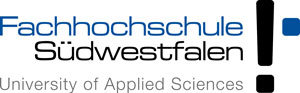



<br>

<div style="margin:auto; display:table;color:black;font-size:18px;font-family:Arial">Semesterabschließende schriftliche Ausarbeitung im Modul Machine Learning des Sommersemesters 2023</div>

<div style="margin:auto; display:table;color:black;font-size:30px;font-family:Arial"><br><br>Binäre Klassifikation am Beispiel des Titanic-Datensatzes</div>

<div style="margin:auto; display:table;color:black;font-size:18px;font-family:Arial"><br><br><br><br>Bearbeitet von Maik Wiese (Matrikelnummer: 10053792)</div>

<div style="margin:auto; display:table;color:black;font-size:18px;font-family:Arial"><br>11. Mai 2023</div>


<a name="einleitung"></a>
# Einleitung
Der Untergang der Titanic stellt ein herausragendes Ereignis in der Schifffahrt dar. Nicht zuletzt wegen der damaligen jungen Kommunikationstechnik verbreitete sich die Nachricht vom Untergang des als unsinkbar geltenden Schiffs um die ganze Welt und wurde so zum Phänomen. Aufgrund dieser Prominenz ist es wenig verwunderlich, dass die Katastrophe in vielen Bereichen der Gesellschaft verarbeitet wurde, sei es in der Kultur oder auch in der Wissenschaft.
[Quelle](https://www1.wdr.de/radio/wdr5/sendungen/zeitzeichen/zeitzeichen-untergang-titanic-100.html)

Die Tragödie ist auch für die Datenwissenschaft (auch *Data Science* genannt) interessant. Es gibt zahlreiche Datensätze zu dem Unglück, die für den Einstieg in die Thematik geeignet sind. Ein solcher Datensatz wird in dieser Arbeit untersucht.
Ziel der Bearbeitung eines sog. *Titanic-Datensatzes* ist häufig die binäre Klassifikation, also das Zuordnen von einzelnen Datenpunkten zu einer von zwei Klassen, um damit vorherzusagen, ob ein Passagier die Havarie überlebt hätte oder dabei umgekommen wäre. Die vorliegende Arbeit hat ebenfalls dieses Ziel: Es soll ein möglichst guter Klassifikator entworfen, trainiert und getestet werden, welcher möglichst genau abschätzen kann, ob ein Passagier überlebt oder stirbt. Dazu werden verschiedene Methoden des Machine Learning auf Grundlage ihrer Qualitätsmaße verglichen.  

Der hier verwendete Datensatz stammt von der Website *[kaggle.com](https://www.kaggle.com/competitions/titanic/data)*. Dort ist der Datensatz im Rahmen eines Wettbewerbs für Website-Mitglieder zu bearbeiten. In dem Wettbewerb wird jener Teilnehmer gesucht, der den besten Klassifikator bezogen auf das. o.g. Ziel erstellen kann.

# Ziel
Die Aufgabe für das Modell ist recht schnell formuliert: Das Modell soll anhand eines Datenpunktes möglichst gut die Folgen des Untergangs für den einzelnen Passagier abschätzen können: Überleben oder Umkommen in der Tragödie. Hinter dieser Aufgabe steckt die sog. binäre Klassifikation, da das Modell eine Ausprägung der beiden möglichen Ergebnissen jedem Datenpunkt zuordnen muss. Dabei ist es nicht erlaubt, dass ein Datenpunkt zwei oder keinem Label zugeordnet wird. Dies fühlte sich auch intuitiv falsch an: Im Hergang gab es keine Passagiere, die überlebt und gestorben sind.

Wie gut ein solcher Klassifikator abschneidet lässt sich mit verschiedenen Qualitätsmaßen messen. Welche für eine adäquate Bewertung eines Klassifiaktaor herangezogen werden sollten, wird Laufe der Ausarbeitung thematisiert.

# Begutachtung der Daten
Nach der Problem- und Zielbeschreibung werden nun die Daten genauer untersucht. Dabei wird systematisch jede Variable begutachtet.
Zuerst werden die Daten, welche ursprünglich in CSV-Dateien vorliegen, in Pandas DataFrame Objekte geladen:

In [2]:
import pandas as pd

In [3]:
# Train Datensatz
train = pd.read_csv("../data/train.csv")

# Test Datensatz
test = pd.read_csv("../data/test.csv")

Es fällt ins Auge, dass die Daten nicht einem großen Datenpool entspringen, aus dem Test- und Trainingsdaten eigenständing separiert werden müssen, sondern diese Unterteilung bereits im Vorfeld geschehen ist. Der Ursprung der Daten ist wie erwähnt *[kaggle.com](https://www.kaggle.com/competitions/titanic/data)*. Da es sich um einen Wettbewerb handelt stellt das durch die Juroren ausgewählte Testset eine einfache Vergleichbarkeit der Teilnehmer sicher.

Nun werden die Daten untersucht:

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
